In [1]:
import xarray as xr
import numpy as np
import pandas as pd

import os
import sys
sys.path.append('home/links/ct715/eddy_feedback/')
import functions.eddy_feedback as ef
import functions.data_wrangling as data

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in divide")

# CanESM5

In [2]:
CanESM5 = xr.open_mfdataset('/home/links/ct715/data_storage/PAMIP/processed_monthly/CanESM5_1.1_ubar_epfy_divFy.nc',
                        parallel=True, chunks={'time': 31})

CanESM5_EFP = ef.calculate_efp_pamip(CanESM5, which_div1='divFy')

can = CanESM5.where(CanESM5.level < 1000.)
can = can.where(can.level > 1.)
can = can.where(can.lat > -90.)
can = can.where(can.lat < 90)
can = can.interp(lat=np.arange(-90,93,3))
can = ef.calculate_divFphi(can, save_divFphi='divF')
can_EFP = ef.calculate_efp_pamip(can, which_div1='divF')

print(f'New EFP: {CanESM5_EFP}\nOld EFP: {can_EFP}')

New EFP: 0.4314
Old EFP: 0.4516


# CESM1-WACCM-SC

In [3]:
CESM1 = xr.open_mfdataset('/home/links/ct715/data_storage/PAMIP/processed_monthly/CESM1*.nc',
                        parallel=True, chunks={'time': 31})

CESM1_EFP = ef.calculate_efp_pamip(CESM1, which_div1='divFy')

waccm = CESM1.where(CESM1.level < 1000.)
waccm = waccm.where(waccm.level > 1.)
waccm = waccm.where(waccm.lat > -90.)
waccm = waccm.where(waccm.lat < 90)
waccm = waccm.interp(lat=np.arange(-90,93,3))
waccm = ef.calculate_divFphi(waccm, save_divFphi='divF')
waccm_EFP = ef.calculate_efp_pamip(waccm, which_div1='divF')

print(f'New EFP: {CESM1_EFP}\nOld EFP: {waccm_EFP}')

New EFP: 0.1325
Old EFP: 0.1446


# CESM2 

In [4]:
CESM2 = xr.open_mfdataset('/home/links/ct715/data_storage/PAMIP/processed_monthly/CESM2_1.1_ubar_epfy_divFy.nc',
                        parallel=True, chunks={'time': 31})

CESM2_EFP = ef.calculate_efp_pamip(CESM2, which_div1='divFy')

cesm = CESM2.where(CESM2.level < 1000.)
cesm = cesm.where(cesm.level > 1.)
cesm = cesm.where(cesm.lat > -90.)
cesm = cesm.where(cesm.lat < 90)
cesm = cesm.interp(lat=np.arange(-90,93,3))
cesm = ef.calculate_divFphi(cesm, save_divFphi='divF')
cesm_EFP = ef.calculate_efp_pamip(cesm, which_div1='divF')

print(f'New EFP: {CESM2_EFP}\nOld EFP: {cesm_EFP}')

New EFP: 0.3782
Old EFP: 0.4213


# CNRM-CM6-1

In [5]:
# import processed dataset:
cnrm_ds = xr.open_mfdataset(
    '/home/links/ct715/data_storage/PAMIP/processed_monthly/CNRM-CM6-1_1.1_ubar_epfy_divFy.nc',
    parallel=True,
)

# new method
cnrm_EFP = ef.calculate_efp_pamip(cnrm_ds, which_div1='divFy')

# old method
cnrm_cm6 = cnrm_ds.where(cnrm_ds.level < 1000.)
cnrm_cm6 = cnrm_cm6.where(cnrm_cm6.level > 1.)
cnrm_cm6 = cnrm_cm6.where(cnrm_cm6.lat > -90.)
cnrm_cm6 = cnrm_cm6.where(cnrm_cm6.lat < 90)
cnrm_cm6 = cnrm_cm6.interp(lat=np.arange(-90,93,3))
cnrm_cm6 = ef.calculate_divFphi(cnrm_cm6, save_divFphi='divF')
cnrm_cm6_EFP = ef.calculate_efp_pamip(cnrm_cm6, which_div1='divF')

print(f'New EFP: {cnrm_EFP}\nOld EFP: {cnrm_cm6_EFP}')

New EFP: 0.2469
Old EFP: 0.2819


# E3SMv1

In [6]:
# import processed dataset:
e3sm_ds = xr.open_mfdataset(
    '/home/links/ct715/data_storage/PAMIP/processed_monthly/E3SMv1_1.1_ubar_epfy_divFy.nc',
    parallel=True,
)

# new method
e3sm_EFP = ef.calculate_efp_pamip(e3sm_ds, which_div1='divFy')

# old method
e3smv1 = e3sm_ds.where(e3sm_ds.level < 1000.)
e3smv1 = e3smv1.where(e3smv1.level > 1.)
e3smv1 = e3smv1.where(e3smv1.lat > -90.)
e3smv1 = e3smv1.where(e3smv1.lat < 90)
e3smv1 = e3smv1.interp(lat=np.arange(-90,93,3))
e3smv1 = ef.calculate_divFphi(e3smv1, save_divFphi='divF')
e3smv1_EFP = ef.calculate_efp_pamip(e3smv1, which_div1='divF')

print(f'New EFP: {e3sm_EFP}\nOld EFP: {e3smv1_EFP}')

New EFP: 0.0533
Old EFP: 0.0584


# EC-EARTH3

In [7]:
# import processed dataset:
ec_earth_ds = xr.open_mfdataset(
    '/home/links/ct715/data_storage/PAMIP/processed_monthly/EC-EARTH3_1.1_ubar_epfy_divFy.nc',
    parallel=True,
)

# new method
ec_earth_EFP = ef.calculate_efp_pamip(ec_earth_ds, which_div1='divFy')

# old method
earth3 = ec_earth_ds.where(ec_earth_ds.level < 1000.)
earth3 = earth3.where(earth3.level > 1.)
earth3 = earth3.where(earth3.lat > -90.)
earth3 = earth3.where(earth3.lat < 90)
earth3 = earth3.interp(lat=np.arange(-90,93,3))
earth3 = ef.calculate_divFphi(earth3, save_divFphi='divF')
earth3_EFP = ef.calculate_efp_pamip(earth3, which_div1='divF')

print(f'New EFP: {ec_earth_EFP}\nOld EFP: {earth3_EFP}')

New EFP: 0.3003
Old EFP: 0.3538


# ECHAM6.3_AWI

In [8]:
# import processed dataset:
echam_ds = xr.open_mfdataset(
    '/home/links/ct715/data_storage/PAMIP/processed_monthly/ECHAM6.3_1.1_ubar_epfy_divFy.nc',
    parallel=True,
)

# new method
echam_EFP = ef.calculate_efp_pamip(echam_ds, which_div1='divFy')

# old method
awi = echam_ds.where(echam_ds.level < 1000.)
awi = awi.where(awi.level > 1.)
awi = awi.where(awi.lat > -90.)
awi = awi.where(awi.lat < 90)
awi = awi.interp(lat=np.arange(-90,93,3))
awi = ef.calculate_divFphi(awi, save_divFphi='divF')
awi_EFP = ef.calculate_efp_pamip(awi, which_div1='divF')

print(f'New EFP: {echam_EFP}\nOld EFP: {awi_EFP}')

New EFP: 0.0134
Old EFP: 0.0142


# FGOALS-f3-L

In [9]:
FGOALS = xr.open_mfdataset('/home/links/ct715/data_storage/PAMIP/processed_monthly/FGOALS-f3-L_1.1_ubar_epfy_divFy.nc',
                        parallel=True, chunks={'time': 31})

FGOALS_EFP = ef.calculate_efp_pamip(FGOALS, which_div1='divFy')

fgoals_f3 = FGOALS.where(FGOALS.level < 1000.)
fgoals_f3 = fgoals_f3.where(fgoals_f3.level > 1.)
fgoals_f3 = fgoals_f3.where(fgoals_f3.lat > -90.)
fgoals_f3 = fgoals_f3.where(fgoals_f3.lat < 90)
fgoals_f3 = fgoals_f3.interp(lat=np.arange(-90,93,3))
fgoals_f3 = ef.calculate_divFphi(fgoals_f3, save_divFphi='divF')
fgoals_f3_EFP = ef.calculate_efp_pamip(fgoals_f3, which_div1='divF')

print(f'New EFP: {FGOALS_EFP}\nOld EFP: {fgoals_f3_EFP}')

New EFP: 0.2395
Old EFP: 0.2688


# HadGEM3-GC31-LL

In [10]:
# import processed dataset:
hadll_ds = xr.open_mfdataset(
    '/home/links/ct715/data_storage/PAMIP/processed_monthly/HadGEM3-GC31-LL_1.1_ubar_epfy_divFy.nc',
    parallel=True,
)

# new method
hadll_EFP = ef.calculate_efp_pamip(hadll_ds, which_div1='divFy')

# old method
gc31_ll = hadll_ds.where(hadll_ds.level < 1000.)
gc31_ll = gc31_ll.where(gc31_ll.level > 1.)
gc31_ll = gc31_ll.where(gc31_ll.lat > -90.)
gc31_ll = gc31_ll.where(gc31_ll.lat < 90)
gc31_ll = gc31_ll.interp(lat=np.arange(-90,93,3))
gc31_ll = ef.calculate_divFphi(gc31_ll, save_divFphi='divF')
gc31_ll_EFP = ef.calculate_efp_pamip(gc31_ll, which_div1='divF')

print(f'New EFP: {hadll_EFP}\nOld EFP: {gc31_ll_EFP}')

New EFP: 0.278
Old EFP: 0.3216


# HadGEM3-GC31-MM

In [11]:
HadGEM3 = xr.open_mfdataset('/home/links/ct715/data_storage/PAMIP/processed_monthly/HadGEM3-GC31-MM_1.1_ubar_epfy_divFy.nc',
                        parallel=True, chunks={'time': 31})

HadGEM3_EFP = ef.calculate_efp_pamip(HadGEM3, which_div1='divFy')

hadmm = HadGEM3.where(HadGEM3.level < 1000.)
hadmm = hadmm.where(hadmm.level > 1.)
hadmm = hadmm.where(hadmm.lat > -90.)
hadmm = hadmm.where(hadmm.lat < 90)
hadmm = hadmm.interp(lat=np.arange(-90,93,3))
hadmm = ef.calculate_divFphi(hadmm, save_divFphi='divF')
hadmm_EFP = ef.calculate_efp_pamip(hadmm, which_div1='divF')

print(f'New EFP: {HadGEM3_EFP}\nOld EFP: {hadmm_EFP}')

New EFP: 0.3166
Old EFP: 0.3807


# IPSL-CM6A-LR

In [12]:
# import processed dataset:
ipsl_ds = xr.open_mfdataset(
    '/home/links/ct715/data_storage/PAMIP/processed_monthly/IPSL-CM6A-LR_1.1_ubar_epfy_divFy.nc',
    parallel=True,
)

# new method
ipsl_EFP = ef.calculate_efp_pamip(ipsl_ds, which_div1='divFy')

# old method
ipsl_cm6a = ipsl_ds.where(ipsl_ds.level < 1000.)
ipsl_cm6a = ipsl_cm6a.where(ipsl_cm6a.level > 1.)
ipsl_cm6a = ipsl_cm6a.where(ipsl_cm6a.lat > -90.)
ipsl_cm6a = ipsl_cm6a.where(ipsl_cm6a.lat < 90)
ipsl_cm6a = ipsl_cm6a.interp(lat=np.arange(-90,93,3))
ipsl_cm6a = ef.calculate_divFphi(ipsl_cm6a, save_divFphi='divF')
ipsl_cm6a_EFP = ef.calculate_efp_pamip(ipsl_cm6a, which_div1='divF')

print(f'New EFP: {ipsl_EFP}\nOld EFP: {ipsl_cm6a_EFP}')

New EFP: 0.2762
Old EFP: 0.309


# MIROC6

In [13]:
MIROC6 = xr.open_mfdataset('/home/links/ct715/data_storage/PAMIP/processed_monthly/MIROC6_1.1_ubar_epfy_divFy.nc',
                        parallel=True, chunks={'time': 31})

MIROC6_EFP = ef.calculate_efp_pamip(MIROC6, which_div1='divFy')

miroc = MIROC6.where(MIROC6.level < 1000.)
miroc = miroc.where(miroc.level > 1.)
miroc = miroc.where(miroc.lat > -90.)
miroc = miroc.where(miroc.lat < 90)
miroc = miroc.interp(lat=np.arange(-90,93,3))
miroc = ef.calculate_divFphi(miroc, save_divFphi='divF')
miroc_EFP = ef.calculate_efp_pamip(miroc, which_div1='divF')

print(f'New EFP: {MIROC6_EFP}\nOld EFP: {miroc_EFP}')

New EFP: 0.2216
Old EFP: 0.2578


# NorESM2-LM

In [14]:
NorESM2 = xr.open_mfdataset('/home/links/ct715/data_storage/PAMIP/processed_monthly/NorESM2-LM_1.1_ubar_epfy_divFy.nc',
                        parallel=True, chunks={'time': 31})

NorESM2_EFP = ef.calculate_efp_pamip(NorESM2, which_div1='divFy')

nor = NorESM2.where(NorESM2.level < 1000.)
nor = nor.where(nor.level > 1.)
nor = nor.where(nor.lat > -90.)
nor = nor.where(nor.lat < 90)
nor = nor.interp(lat=np.arange(-90,93,3))
nor = ef.calculate_divFphi(nor, save_divFphi='divF')
nor_EFP = ef.calculate_efp_pamip(nor, which_div1='divF')

print(f'New EFP: {NorESM2_EFP}\nOld EFP: {nor_EFP}')

New EFP: 0.3294
Old EFP: 0.3539


# OpenIFS-159

In [15]:
# import processed dataset:
open159 = xr.open_mfdataset(
    '/home/links/ct715/data_storage/PAMIP/processed_monthly/OpenIFS-159_1.1_ubar_epfy_divFy.nc',
    parallel=True,
)

# new method
open159_EFP = ef.calculate_efp_pamip(open159, which_div1='divFy')

# old method
ifs159 = open159.where(open159.level < 1000.)
ifs159 = ifs159.where(ifs159.level > 1.)
ifs159 = ifs159.where(ifs159.lat > -90.)
ifs159 = ifs159.where(ifs159.lat < 90)
ifs159 = ifs159.interp(lat=np.arange(-90,93,3))
ifs159 = ef.calculate_divFphi(ifs159, save_divFphi='divF')
ifs159_EFP = ef.calculate_efp_pamip(ifs159, which_div1='divF')

print(f'New EFP: {open159_EFP}\nOld EFP: {ifs159_EFP}')

New EFP: 0.3328
Old EFP: 0.3825


# OpenIFS-511

In [16]:
# import processed dataset:
open511 = xr.open_mfdataset(
    '/home/links/ct715/data_storage/PAMIP/processed_monthly/OpenIFS-511_1.1_ubar_epfy_divFy.nc',
    parallel=True,
)

# new method
open511_EFP = ef.calculate_efp_pamip(open511, which_div1='divFy')

# old method
ifs511 = open511.where(open511.level < 1000.)
ifs511 = ifs511.where(ifs511.level > 1.)
ifs511 = ifs511.where(ifs511.lat > -90.)
ifs511 = ifs511.where(ifs511.lat < 90)
ifs511 = ifs511.interp(lat=np.arange(-90,93,3))
ifs511 = ef.calculate_divFphi(ifs511, save_divFphi='divF')
ifs511_EFP = ef.calculate_efp_pamip(ifs511, which_div1='divF')

print(f'New EFP: {open511_EFP}\nOld EFP: {ifs511_EFP}')

New EFP: 0.2325
Old EFP: 0.2751


# TABLE TIME

In [17]:
def calculate_various_efp_pamip(model, calc_south_hemis=False):
    
    # new method
    new_EFP = ef.calculate_efp_pamip(
        model, 
        which_div1='divFy', 
        calc_south_hemis=calc_south_hemis
    )

    # old method
    old_method = model.where(model.level < 1000.)
    old_method = old_method.where(old_method.level > 1.)
    old_method = old_method.where(old_method.lat > -90.)
    old_method = old_method.where(old_method.lat < 90)
    old_method = old_method.interp(lat=np.arange(-90,93,3))
    old_method = ef.calculate_divFphi(old_method, save_divFphi='divF')
    
    old_method_EFP = ef.calculate_efp_pamip(
        old_method, 
        which_div1='divF', 
        calc_south_hemis=calc_south_hemis
    )
    
    return new_EFP, old_method_EFP

In [18]:
path_dir = '/home/links/ct715/data_storage/PAMIP/processed_monthly/'

# extract model names
files = os.listdir(path_dir)
models = [os.path.basename(f).split('_')[0] for f in files]
models.sort()
models.remove('regridded')

# Create dictionary containing each model name and dataset
pamip_datasets = {}
for model in models:
    # create file path by joining directory and model name
    file_path = os.path.join(path_dir, f'{model}_*.nc')
    
    # open xarray dataset
    ds = xr.open_mfdataset(
        file_path,
        parallel=True,
        chunks={'time':31}
    )
    
    # Add dataset to dictionary with required model name
    pamip_datasets[model] = ds 

In [19]:
pamip_table = []
pamip_table_diff = []
for model_name, ds in pamip_datasets.items():
    
    # calculate efp for both hemis
    NH_new_EFP, NH_old_EFP = calculate_various_efp_pamip(ds)
    SH_new_EFP, SH_old_EFP = calculate_various_efp_pamip(ds, calc_south_hemis=True)
    
    # add dictionary to a list
    pamip_table.append({'Model': model_name, 
                        'Regridded NH EFP': NH_old_EFP, 'New NH EFP': NH_new_EFP, 
                        'Regridded SH EFP': SH_old_EFP, 'New SH EFP': SH_new_EFP})
    
    pamip_table_diff.append({'Model': model_name, 
                             'NH Difference': NH_old_EFP-NH_new_EFP, 
                             'SH Difference': SH_old_EFP-SH_new_EFP})
    
df_pamip = pd.DataFrame(pamip_table)
df_pamip

,Model,Regridded NH EFP,New NH EFP,Regridded SH EFP,New SH EFP
0,CESM1-WACCM-SC,0.1446,0.1325,0.0308,0.0295
1,CESM2,0.4213,0.3782,0.3803,0.3528
2,CNRM-CM6-1,0.2819,0.2469,0.2549,0.2145
3,CanESM5,0.4516,0.4314,0.4917,0.4715
4,E3SMv1,0.0584,0.0533,0.0598,0.0545
5,EC-EARTH3,0.3538,0.3003,0.3699,0.3194
6,ECHAM6.3,0.0142,0.0134,0.0106,0.0104
7,FGOALS-f3-L,0.2688,0.2395,0.1548,0.1306
8,HadGEM3-GC31-LL,0.3216,0.2780,0.3496,0.3037
9,HadGEM3-GC31-MM,0.3807,0.3166,0.3705,0.3071


In [20]:
df_pamip_diff = pd.DataFrame(pamip_table_diff)
df_pamip_diff

,Model,NH Difference,SH Difference
0,CESM1-WACCM-SC,0.0121,0.0013
1,CESM2,0.0431,0.0275
2,CNRM-CM6-1,0.0350,0.0404
3,CanESM5,0.0202,0.0202
4,E3SMv1,0.0051,0.0053
5,EC-EARTH3,0.0535,0.0505
6,ECHAM6.3,0.0008,0.0002
7,FGOALS-f3-L,0.0293,0.0242
8,HadGEM3-GC31-LL,0.0436,0.0459
9,HadGEM3-GC31-MM,0.0641,0.0634


# Plotting Time

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

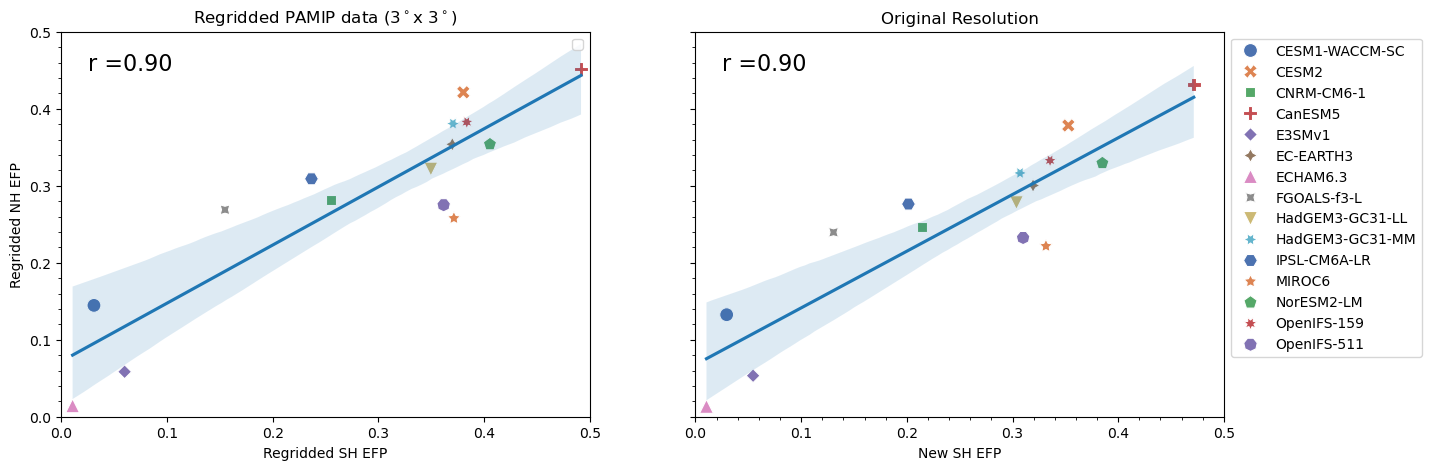

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5), sharey=True)

## FIGURE 1

scatter_plot1 = sns.scatterplot(
    x='Regridded SH EFP', 
    y='Regridded NH EFP', 
    hue='Model', 
    style='Model', 
    data=df_pamip, 
    palette='deep', 
    markers=True, 
    s=100,
    ax=ax1
)
# Plot the regression line
sns.regplot(
    x='Regridded SH EFP', 
    y='Regridded NH EFP', 
    data=df_pamip, 
    scatter=False, 
    ax=scatter_plot1
)
ax1.legend([])
ax1.set_ylim(0,0.5)
ax1.set_xlim(0,0.5)
ax1.set_title('Regridded PAMIP data (3$^\\circ$x 3$^\\circ$)')

# Insert Pearson's correlation
r1, p1 = sp.stats.pearsonr(x=df_pamip['Regridded NH EFP'], y=df_pamip['Regridded SH EFP'])
ax = plt.gca()
plt.text(-1.15, .9, "r ={:.2f}".format(r1), transform=ax.transAxes, fontsize=16)


## FIGURE 2

scatter_plot2 = sns.scatterplot(
    y='New NH EFP', 
    x='New SH EFP', 
    hue='Model', 
    style='Model', 
    data=df_pamip, 
    palette='deep', 
    markers=True, 
    s=100,
    ax=ax2
)
# Plot the regression line
sns.regplot(
    y='New NH EFP', 
    x='New SH EFP', 
    data=df_pamip, 
    scatter=False, 
    ax=scatter_plot2
)
ax2.set_xlim(0,0.5)
ax2.set_title('Original Resolution')

# Insert Pearson's correlation
r2, p2 = sp.stats.pearsonr(x=df_pamip['New SH EFP'], y=df_pamip['New NH EFP'])
ax = plt.gca()
plt.text(.05, .9, "r ={:.2f}".format(r2), transform=ax.transAxes, fontsize=16)

plt.minorticks_on()
plt.legend(bbox_to_anchor=(1,1))

plt.savefig('/home/links/ct715/eddy_feedback/plots/pamip_resolution.pdf')
plt.show()